# Explore

In [50]:
import pandas as pd
import numpy as np
import plotly_express as px

# Get Data

In [22]:
N = pd.read_csv("data/2020/mod/N.csv").set_index('index')
E = pd.read_csv("data/2020/mod/E.csv").set_index(['person_id','referent_id','relation_id'])
R = pd.read_csv("data/2020/mod/R.csv").set_index('relation_id')

In [85]:
M = E.n.unstack(fill_value=0)

In [86]:
px_idx = M.reset_index().apply(lambda x: x.person_id + ' -> ' + x.referent_id, axis=1)

In [87]:
M.index = px_idx

In [88]:
M['SUM'] = M.sum(1)

In [90]:
M.sort_values('SUM', ascending=False).iloc[:, :4].style.background_gradient(cmap='YlGnBu', axis=None)

relation_id,akin_to,attacked,defended,dissimilar
JOHN_DENNIS -> ALEXANDER_POPE,0,56,0,0
EDMUND_CURLL -> ALEXANDER_POPE,0,11,0,1
COLLEY_CIBBER -> ALEXANDER_POPE,1,9,0,0
COLLEY_CIBBER -> DULNESS,9,0,0,0
EDMUND_CURLL -> JOHN_DENNIS,8,0,0,0
EDMUND_CURLL -> LEWIS_THEOBALD,4,2,0,1
JOHN_DENNIS -> CHARLES_GILDON,5,0,0,0
JOHN_DENNIS -> LEWIS_THEOBALD,5,0,0,0
GILES_JACOB -> ALEXANDER_POPE,0,4,1,0
EDMUND_CURLL -> BERNARD_LINTOT,5,0,0,0


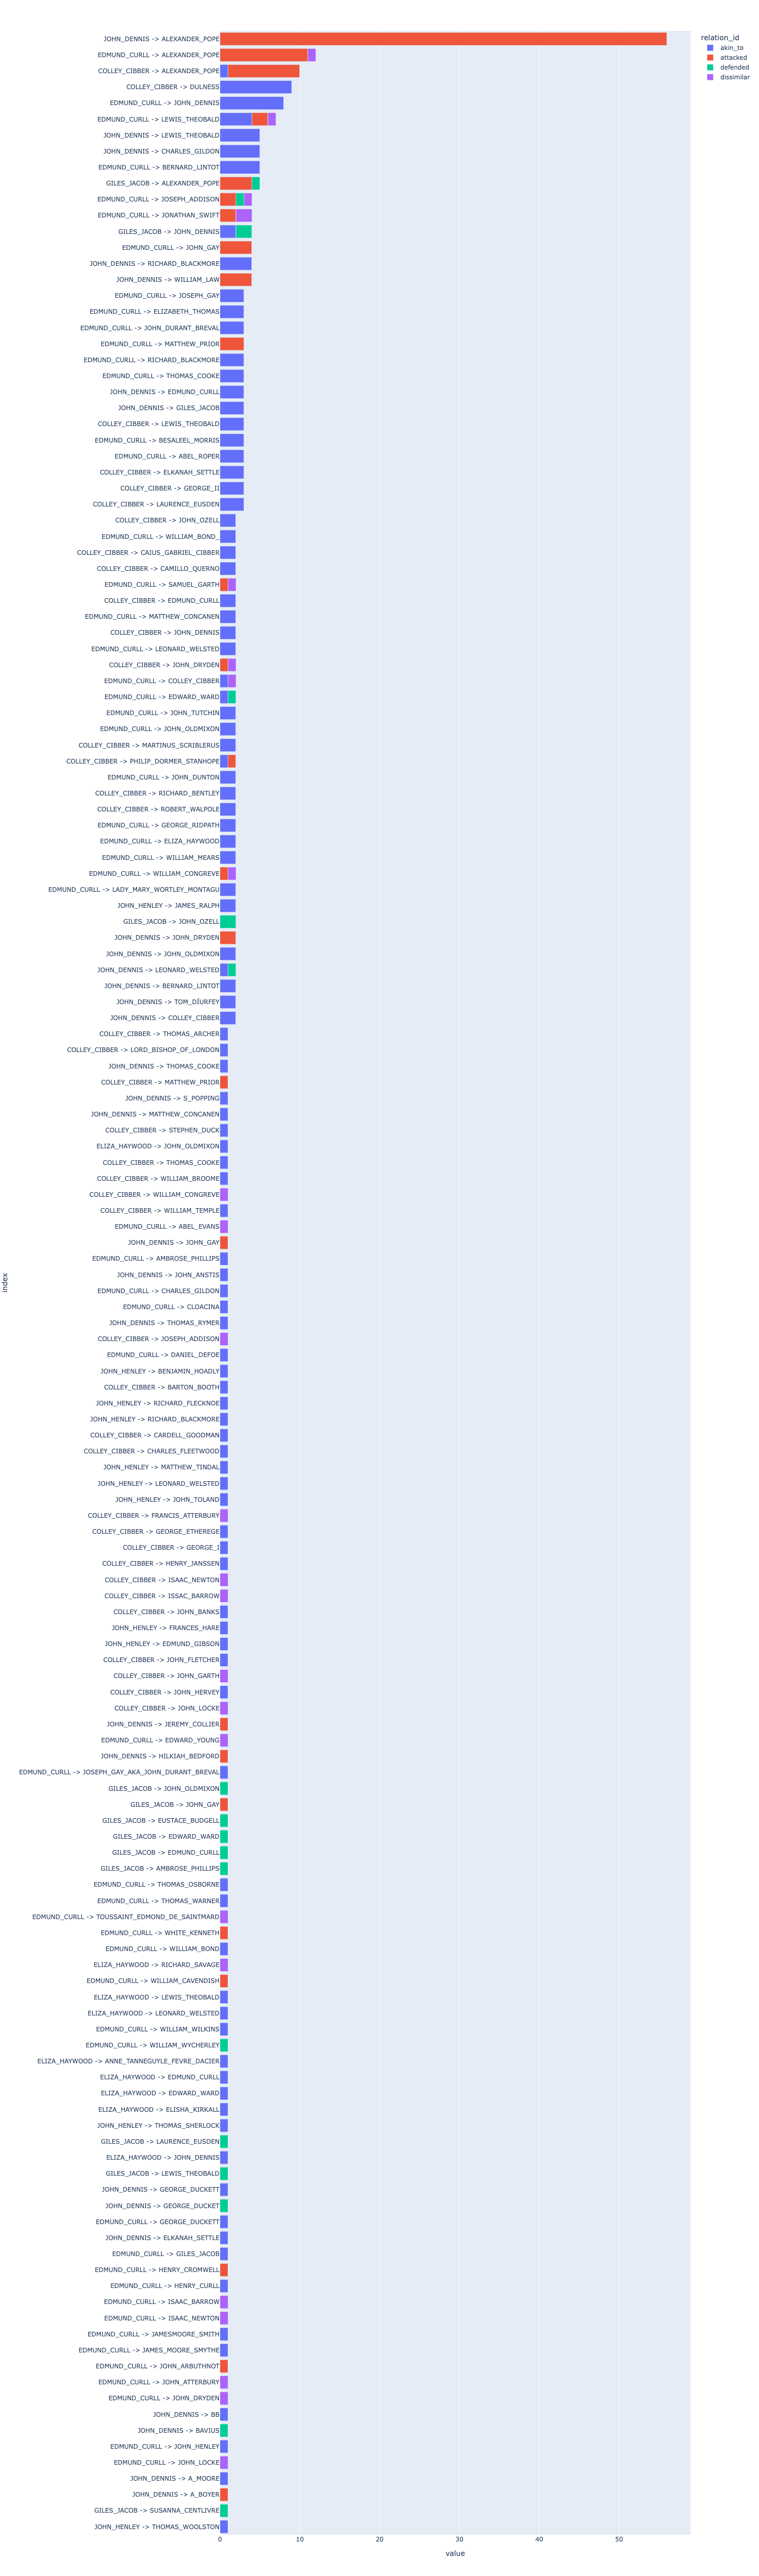

In [91]:
px.bar(M.sort_values('SUM').iloc[:, :4], orientation='h', height=5000)

In [71]:
# M.sort_values('SUM', ascending=False).head(20).plot.bar();

In [26]:
MR = {}
for r in R.index:
    MR[r] = M[r].unstack(fill_value=0).T
    MR[r]['SUM'] = MR[r].sum(1)
    MR[r] = MR[r].sort_values('SUM', ascending=False)

In [37]:
MR.SUM.head(20).plot.barh()

AttributeError: 'dict' object has no attribute 'SUM'

<Axes: ylabel='referent_id'>

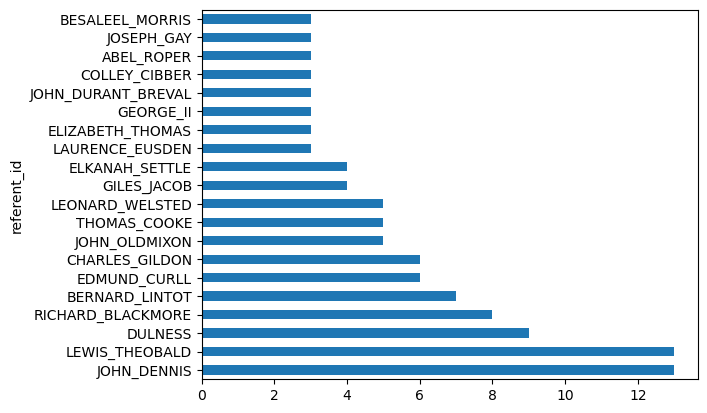

In [36]:
MR['akin_to'].SUM.head(20).plot.barh()

In [28]:
MR['attacked']

person_id,COLLEY_CIBBER,EDMUND_CURLL,ELIZA_HAYWOOD,GILES_JACOB,JOHN_DENNIS,JOHN_HENLEY,SUM
referent_id,,,,,,,
ALEXANDER_POPE,9,11,0,4,56,0,80
JOHN_GAY,0,4,0,1,1,0,6
WILLIAM_LAW,0,0,0,0,4,0,4
MATTHEW_PRIOR,1,3,0,0,0,0,4
JOHN_DRYDEN,1,0,0,0,2,0,3
...,...,...,...,...,...,...,...
GEORGE_DUCKETT,0,0,0,0,0,0,0
GEORGE_DUCKET,0,0,0,0,0,0,0
FRANCIS_ATTERBURY,0,0,0,0,0,0,0


In [29]:
R

,n,color,label
relation_id,,,
akin_to,189,green,akin to
attacked,113,red,attacked
dissimilar,25,orange,dissimilar
defended,19,blue,defended


In [30]:
MR['dissimilar']

person_id,COLLEY_CIBBER,EDMUND_CURLL,ELIZA_HAYWOOD,GILES_JACOB,JOHN_DENNIS,JOHN_HENLEY,SUM
referent_id,,,,,,,
JOHN_DRYDEN,1,1,0,0,0,0,2
JOSEPH_ADDISON,1,1,0,0,0,0,2
ISAAC_NEWTON,1,1,0,0,0,0,2
JOHN_LOCKE,1,1,0,0,0,0,2
JONATHAN_SWIFT,0,2,0,0,0,0,2
...,...,...,...,...,...,...,...
JAMESMOORE_SMITH,0,0,0,0,0,0,0
BESALEEL_MORRIS,0,0,0,0,0,0,0
CAIUS_GABRIEL_CIBBER,0,0,0,0,0,0,0


In [31]:
MR['defended']

person_id,COLLEY_CIBBER,EDMUND_CURLL,ELIZA_HAYWOOD,GILES_JACOB,JOHN_DENNIS,JOHN_HENLEY,SUM
referent_id,,,,,,,
JOHN_DENNIS,0,0,0,2,0,0,2
JOHN_OZELL,0,0,0,2,0,0,2
EDWARD_WARD,0,1,0,1,0,0,2
WILLIAM_WYCHERLEY,0,1,0,0,0,0,1
EDMUND_CURLL,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...
GEORGE_RIDPATH,0,0,0,0,0,0,0
GEORGE_II,0,0,0,0,0,0,0
GEORGE_I,0,0,0,0,0,0,0
